In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


"""
References:

- ChatGPT

"""

/Users/adeel/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("cyberbullying_tweets.csv")

In [3]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [4]:
my_tags = ['religion','age','gender','ethnicity','not_cyberbullying','other_cyberbullying']
pd.DataFrame(df.groupby('cyberbullying_type').size().rename('counts')).sort_values('counts', ascending=False)
#all fairly equal in distribution

,counts
cyberbullying_type,
religion,7998
age,7992
gender,7973
ethnicity,7961
not_cyberbullying,7945
other_cyberbullying,7823


<AxesSubplot:>

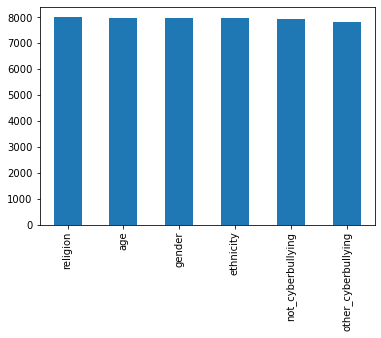

In [5]:
df.cyberbullying_type.value_counts().plot(kind='bar')

In [6]:
otherCyberbullying = df[df['cyberbullying_type'] == "other_cyberbullying"]

In [9]:
otherCyberbullying

,tweet_text,cyberbullying_type
23916,"@ikralla fyi, it looks like I was caught by it...",other_cyberbullying
23917,I need to just switch to an organization-based...,other_cyberbullying
23918,RMAed my monoprice. Shoddy power bricks on tho...,other_cyberbullying
23919,@murphy_slaw https://t.co/M8w8xnUnDL,other_cyberbullying
23920,@1Life0Continues i've got the code to interpre...,other_cyberbullying
...,...,...
31734,"@kufr666 @blockbot no, that's @oolon",other_cyberbullying
31735,@AriMelber why are you giving these idiots air...,other_cyberbullying
31736,I am right now watching Enforcers defend Chums...,other_cyberbullying
31737,✨✨✨ misandry is not a word iOS can autocomplet...,other_cyberbullying


In [13]:
new_df = df.copy()

In [15]:
other_cyberbullying_rows = new_df['cyberbullying_type'] == 'other_cyberbullying'

In [16]:
other_cyberbullying_rows

0        False
1        False
2        False
3        False
4        False
         ...  
47687    False
47688    False
47689    False
47690    False
47691    False
Name: cyberbullying_type, Length: 47692, dtype: bool

In [17]:
other_cyberbullying_tweets = new_df.loc[other_cyberbullying_rows, 'tweet_text']

In [22]:
def categorizeTweet(tweet):
    if 'religion' in tweet.lower():
        return 'religion'
    
    elif 'age' in tweet.lower():
        return 'age'
    
    elif 'gender' in tweet.lower():
        return 'gender'
    
    elif 'ethnicity' in tweet.lower():
        return 'ethnicity'
    
    return "not_cyberbullying"

In [23]:
new_df.loc[other_cyberbullying_rows, 'cyberbullying_type'] = other_cyberbullying_tweets.apply(categorizeTweet)

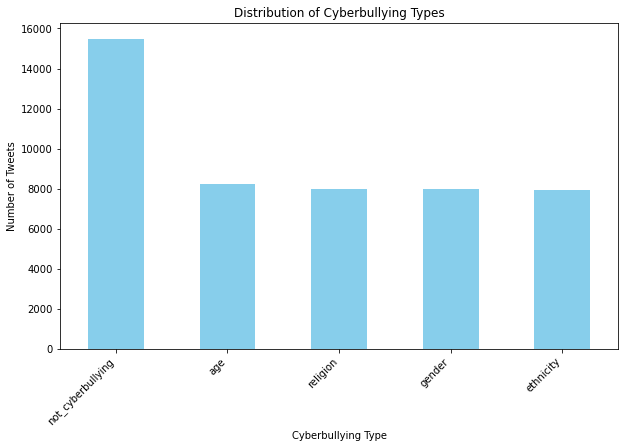

In [24]:
type_counts = new_df['cyberbullying_type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cyberbullying Types')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [25]:
new_df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
